<a href="https://colab.research.google.com/github/jayasuneja/FWE458_Spring25/blob/main/Homework4_Suneja/Homework4_Suneja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 4: Linear Regression Model with SciPy Optimization and Statistics Objective

In this assignment, you will apply linear regression techniques using SciPy's optimization and statistical functions to model Gross Primary Productivity (GPP) based on environmental factors. You will analyze how Shortwave Radiation (SW), Vapor Pressure Deficit (VPD), and Air Temperature (TA) impact GPP. Additionally, you will include interaction terms to account for potential variable interactions.

Dataset: **Wcr_GPPdaily.csv**
* Contains daily measurements of GPP and environmental factors
  * TIMESTAMP: Date of observation (YYYYMMDD)
  * TA_F: Air Temperature [C]
  * SW_IN_F: Shortwave Radiation [W/m2]
  * VPD_F: Vapor Pressure Deficit [kPa]
  * GPP_NT_VUT_REF: Gross Primary Productivity [gC/m2/day]

* For this assignment, rename the columns as follows:
  * TA_F -- TA
  * SW_IN_F -- SW
  * VPD_F -- VPD
  * GPP_NT_VUT_REF -- GPP (Target Variable)

# Tasks


# 1) Data Preprocessing (1 point)

## 1a) Load the data using pandas and display the first few rows

In [27]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')
filedir = '/content/drive/MyDrive/FWE458/'
drive.mount("/content/drive", force_remount=True)

# importing dataset
import pandas as pd
fname = filedir + "Wcr_GPPdaily.csv"
DF = pd.read_csv(fname)

# printing DF head
print(DF.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Mounted at /content/drive
   TIMESTAMP    TA_F  SW_IN_F  VPD_F  GPP_NT_VUT_REF
0   19990101 -20.063   72.603  0.413       -0.517364
1   19990102 -12.814   12.358  0.147       -0.094241
2   19990103 -12.625   33.132  0.128       -0.166819
3   19990104 -18.652   93.481  0.263       -0.582301
4   19990105 -20.269   45.502  0.261       -0.568240


## 1b) Rename columns

In [28]:
# Renaming TA_F -- TA
DF.rename(columns = {"TA_F":"TA"}, inplace = True)

# Renaming SW_IN_F -- SW
DF.rename(columns = {"SW_IN_F":"SW"}, inplace = True)

# Renaming VPD_F -- VPD
DF.rename(columns = {"VPD_F":"VPD"}, inplace = True)

# Renaming GPP_NT_VUT_REF -- GPP (target variable)
DF.rename(columns = {"GPP_NT_VUT_REF":"GPP"}, inplace = True)

# Displaying new column titles
print(DF.head())  # sucess!

   TIMESTAMP      TA      SW    VPD       GPP
0   19990101 -20.063  72.603  0.413 -0.517364
1   19990102 -12.814  12.358  0.147 -0.094241
2   19990103 -12.625  33.132  0.128 -0.166819
3   19990104 -18.652  93.481  0.263 -0.582301
4   19990105 -20.269  45.502  0.261 -0.568240


## 1c) Drop the TIMESTAMP column as it is not needed for regression

In [ ]:
# dropping TIMESTAMP column
DF.drop(columns = ["TIMESTAMP"], inplace = True, errors = "ignore")

# displaying new dataframe
print(DF.head())  # sucess!

       TA      SW    VPD       GPP
0 -20.063  72.603  0.413 -0.517364
1 -12.814  12.358  0.147 -0.094241
2 -12.625  33.132  0.128 -0.166819
3 -18.652  93.481  0.263 -0.582301
4 -20.269  45.502  0.261 -0.568240


## 1d) Check for missing values and handle them if they exist

In [47]:
# Checking for missing values
DF.isnull().sum() # looks like there are no missing values!
DF.dropna(inplace=True)
DF = DF[DF['GPP'] >= -20] # graphing the data, I noticed that the original dataset had a large chunk of -9999 values, so I filtered the dataset to exclude these values
DF['GPP'] = DF['GPP'].interpolate(method = 'linear')

# 2) Feature Engineering -- Interaction Terms (1 point)

## 2a) Create interaction terms between predictors
* SW x VPD
* SW x TA
* VPD x TA


In [48]:
DF['SW_VPD'] = DF['SW'] * DF['VPD'] # interaction term SW x VPD
DF['SW_TA'] = DF['SW'] * DF['TA'] # interaction term SW x TA
DF['VPD_TA'] = DF['VPD'] * DF['TA'] # interaction term VPD x TA

print(DF.head())  # printing dataframe head to confirm columns were added

   TIMESTAMP      TA      SW    VPD       GPP     SW_VPD        SW_TA  \
0 1999-01-01 -20.063  72.603  0.413 -0.517364  29.985039 -1456.633989   
1 1999-01-02 -12.814  12.358  0.147 -0.094241   1.816626  -158.355412   
2 1999-01-03 -12.625  33.132  0.128 -0.166819   4.240896  -418.291500   
3 1999-01-04 -18.652  93.481  0.263 -0.582301  24.585503 -1743.607612   
4 1999-01-05 -20.269  45.502  0.261 -0.568240  11.876022  -922.280038   

     VPD_TA  GPP_pred_scipy  GPP_pred_sklearn  
0 -8.286019       -1.281576         -1.281508  
1 -1.883658        0.188561          0.188755  
2 -1.616000        0.155674          0.155807  
3 -4.905476       -1.109175         -1.109202  
4 -5.290209       -0.605097         -0.604941  


# 3) Build a Linear Regression Model using SciPy Optimization (3 points)

## Define the linear model equation then use MSE to minimize function to find the best fit parameters and print optimized parameters

GPP=β0​+β1​⋅SW+β2​⋅VPD+β3​⋅TA+β4​⋅(SW×VPD)+β5​⋅(SW×TA)+β6​⋅(VPD×TA)

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define linear model function
def lineqn_model(param, SW, VPD, TA, SW_VPD, SW_TA, VPD_TA, GPP):
  beta0, beta1, beta2, beta3, beta4, beta5, beta6 = param

  GPP_pred_scipy = beta0 + (beta1*SW) + (beta2*VPD) + (beta3*TA) + (beta4*SW_VPD) + (beta5*SW_TA) + (beta6*VPD_TA)

  # use MSE as a cost function
  return (np.mean((GPP_pred_scipy - GPP)**2))

SW = DF['SW'].values
VPD = DF['VPD'].values
TA = DF['TA'].values
SW_VPD = DF['SW_VPD'].values
SW_TA = DF['SW_TA'].values
VPD_TA = DF['VPD_TA'].values
GPP = DF['GPP'].values

initial_params = [1,1,1,1,1,1,1]  #initial guess is all ones

# Using the function to perform the optimization
result = minimize(lineqn_model, initial_params, args=(SW, VPD, TA, SW_VPD, SW_TA, VPD_TA, GPP), method='BFGS')

# Extract optimized parameters
optimized_params = result.x

# Print optimized parameters
print("\nOptimized Parameters:")
print(f"β0: {optimized_params[0]:.4f}, β1: {optimized_params[1]:.4f}, β2: {optimized_params[2]:.4f}, "
      f"β3: {optimized_params[3]:.4f}, β4: {optimized_params[4]:.4f}, β5: {optimized_params[5]:.4f}, β6: {optimized_params[6]:.4f}")

# Compute predicted GPP using optimized parameters
DF['GPP_pred_scipy'] = optimized_params[0] + (optimized_params[1] * SW) + \
                        (optimized_params[2] * VPD) + (optimized_params[3] * TA) + \
                        (optimized_params[4] * SW_VPD) + (optimized_params[5] * SW_TA) + \
                        (optimized_params[6] * VPD_TA)

print(DF.head())


Optimized Parameters:
β0: 0.2555, β1: 0.0171, β2: -0.7876, β3: -0.0134, β4: -0.0029, β5: 0.0016, β6: 0.0439
   TIMESTAMP      TA      SW    VPD       GPP     SW_VPD        SW_TA  \
0 1999-01-01 -20.063  72.603  0.413 -0.517364  29.985039 -1456.633989   
1 1999-01-02 -12.814  12.358  0.147 -0.094241   1.816626  -158.355412   
2 1999-01-03 -12.625  33.132  0.128 -0.166819   4.240896  -418.291500   
3 1999-01-04 -18.652  93.481  0.263 -0.582301  24.585503 -1743.607612   
4 1999-01-05 -20.269  45.502  0.261 -0.568240  11.876022  -922.280038   

     VPD_TA  GPP_pred_scipy  GPP_pred_sklearn  
0 -8.286019       -1.281576         -1.281508  
1 -1.883658        0.188561          0.188755  
2 -1.616000        0.155674          0.155807  
3 -4.905476       -1.109175         -1.109202  
4 -5.290209       -0.605097         -0.604941  


# 4) Build a Linear Regression Model using Sklearn's Linear Regression Function (3 points)

Fit a linear regression model using Sklearn's LinearRegression Function then extract and print the regression coefficients for the model

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Defining independent vs dependent (target) variables
x = DF[['SW', 'VPD', 'TA', 'SW_VPD','SW_TA','VPD_TA']].values
y = DF[['GPP']].values

# Using the linear regression built in model
model = LinearRegression()
model.fit(x,y)

# New column for GPP_pred_sklearn
DF['GPP_pred_sklearn'] = model.predict(x)

# Print the coefficients and intercept
print("Intercept (β0):", model.intercept_)
print("Coefficients (β1, β2, β3):", model.coef_)

# Checking to see if predictions are added to dataframe
print(DF.head())

Intercept (β0): [0.25560795]
Coefficients (β1, β2, β3): [[ 0.01714709 -0.78754081 -0.0134535  -0.00287589  0.00156326  0.04385347]]
   TIMESTAMP      TA      SW    VPD       GPP     SW_VPD        SW_TA  \
0 1999-01-01 -20.063  72.603  0.413 -0.517364  29.985039 -1456.633989   
1 1999-01-02 -12.814  12.358  0.147 -0.094241   1.816626  -158.355412   
2 1999-01-03 -12.625  33.132  0.128 -0.166819   4.240896  -418.291500   
3 1999-01-04 -18.652  93.481  0.263 -0.582301  24.585503 -1743.607612   
4 1999-01-05 -20.269  45.502  0.261 -0.568240  11.876022  -922.280038   

     VPD_TA  GPP_pred_scipy  GPP_pred_sklearn  
0 -8.286019       -1.281576         -1.281508  
1 -1.883658        0.188561          0.188755  
2 -1.616000        0.155674          0.155807  
3 -4.905476       -1.109175         -1.109202  
4 -5.290209       -0.605097         -0.604941  


# 5) Compare the Models (2 points)

## Compute the R-squared for both models and compare the coefficients obtained from scipy's optimization model and sklearn's LinearRegression function

R-squared formula:

1 - [(actual - predicted)^2 / (actual - mean)^2]

In [51]:
from sklearn.metrics import r2_score

r2_scipy = r2_score(DF['GPP'], DF['GPP_pred_scipy'])
r2_sklearn = r2_score(DF['GPP'], DF['GPP_pred_sklearn'])
print(r2_scipy) # R-squared = 0.6828
print(r2_sklearn) # R-squared = 0.6828

r2_betweenmodels = r2_score(DF['GPP_pred_scipy'], DF['GPP_pred_sklearn'])
print(r2_betweenmodels) # my models have an R-squared of 0.999999

0.6827760488644921
0.6827760492480225
0.9999999994382713


I had to exclude a large chunk of data and linearly interpolate to not have a large missing chunk of GPP values between halfway through 2006 until about 2010 where the GPP values were reported as -9999.

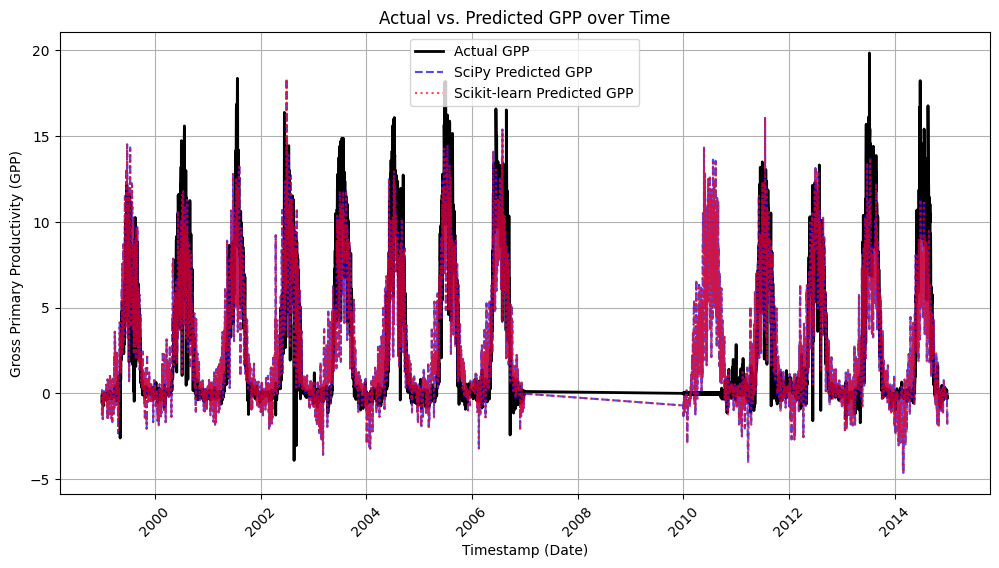

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert TIMESTAMP to datetime for proper plotting
DF['TIMESTAMP'] = pd.to_datetime(DF['TIMESTAMP'], format='%Y%m%d')  # Adjust format if needed

# Plot GPP (Actual) vs. Predictions
plt.figure(figsize=(12, 6))
plt.plot(DF['TIMESTAMP'], DF['GPP'], label='Actual GPP', color='black', linewidth=2)
plt.plot(DF['TIMESTAMP'], DF['GPP_pred_scipy'], label='SciPy Predicted GPP', linestyle='dashed', color='blue', alpha=0.7)
plt.plot(DF['TIMESTAMP'], DF['GPP_pred_sklearn'], label='Scikit-learn Predicted GPP', linestyle='dotted', color='red', alpha=0.7)

# Formatting the plot
plt.xlabel("Timestamp (Date)")
plt.ylabel("Gross Primary Productivity (GPP)")
plt.title("Actual vs. Predicted GPP over Time")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()